In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import uncertainties as unc
from unc_tools import FunctionBase1D, UncRegression
import os

SAVE_DIR = "/home/yaroslav/vzlet_vault/Практикум/Кинетика каталитических реакций/"

def savefig(name, path= "", fig=None, bbox_inches = None, **kwargs):
    os.makedirs(SAVE_DIR, exist_ok=True)
    if bbox_inches is None:
        bbox_inches = "tight"
    if fig is None:
        fig = plt.gcf()
    new_path = os.path.join(SAVE_DIR, name)
    fig.savefig(new_path, bbox_inches = bbox_inches, **kwargs)
    fig.savefig(os.path.join(".", path, name), bbox_inches = bbox_inches, **kwargs)
    #print(f"Saved: {path}")

In [9]:



data_25C = {
    "t_min": [0, 34 / 60, 10, 20, 30, 40, 50, 60],
    "D": [0.705, 0.744, 0.650, 0.641, 0.575, 0.510, 0.470, 0.403],
}

data_35C = {
    "t_min": [0, 25 / 60, 5, 10, 15, 20, 25, 30, 35],
    "D": [0.737, 0.754, 0.664, 0.580, 0.485, 0.394, 0.283, 0.195, 0.100],
}

data_45C = {
    "t_min": [0, 18 / 60, 2, 4, 6, 8, 10, 12, 14],
    "D": [0.777, 0.693, 0.682, 0.613, 0.509, 0.405, 0.296, 0.194, 0.009],
}

df_25C = pd.DataFrame(data_25C)
df_35C = pd.DataFrame(data_35C)
df_45C = pd.DataFrame(data_45C)

dfs = [df_25C, df_35C, df_45C]

C0_i2 = 0.1
V0_i2 = 2
C0_i2 = C0_i2 * V0_i2 / (100 + 1)

C0_hcl = 1
V0_hcl = 8
C0_hcl = C0_hcl * V0_hcl / (100 + 1)

ro_ac = 0.791
V0_ac = 1
M_ac = 12 * 3 + 8 + 16
n0_ac = ro_ac * V0_ac / M_ac
C0_ac = n0_ac / (100 + 1)

UncRegression.latex_style(True)

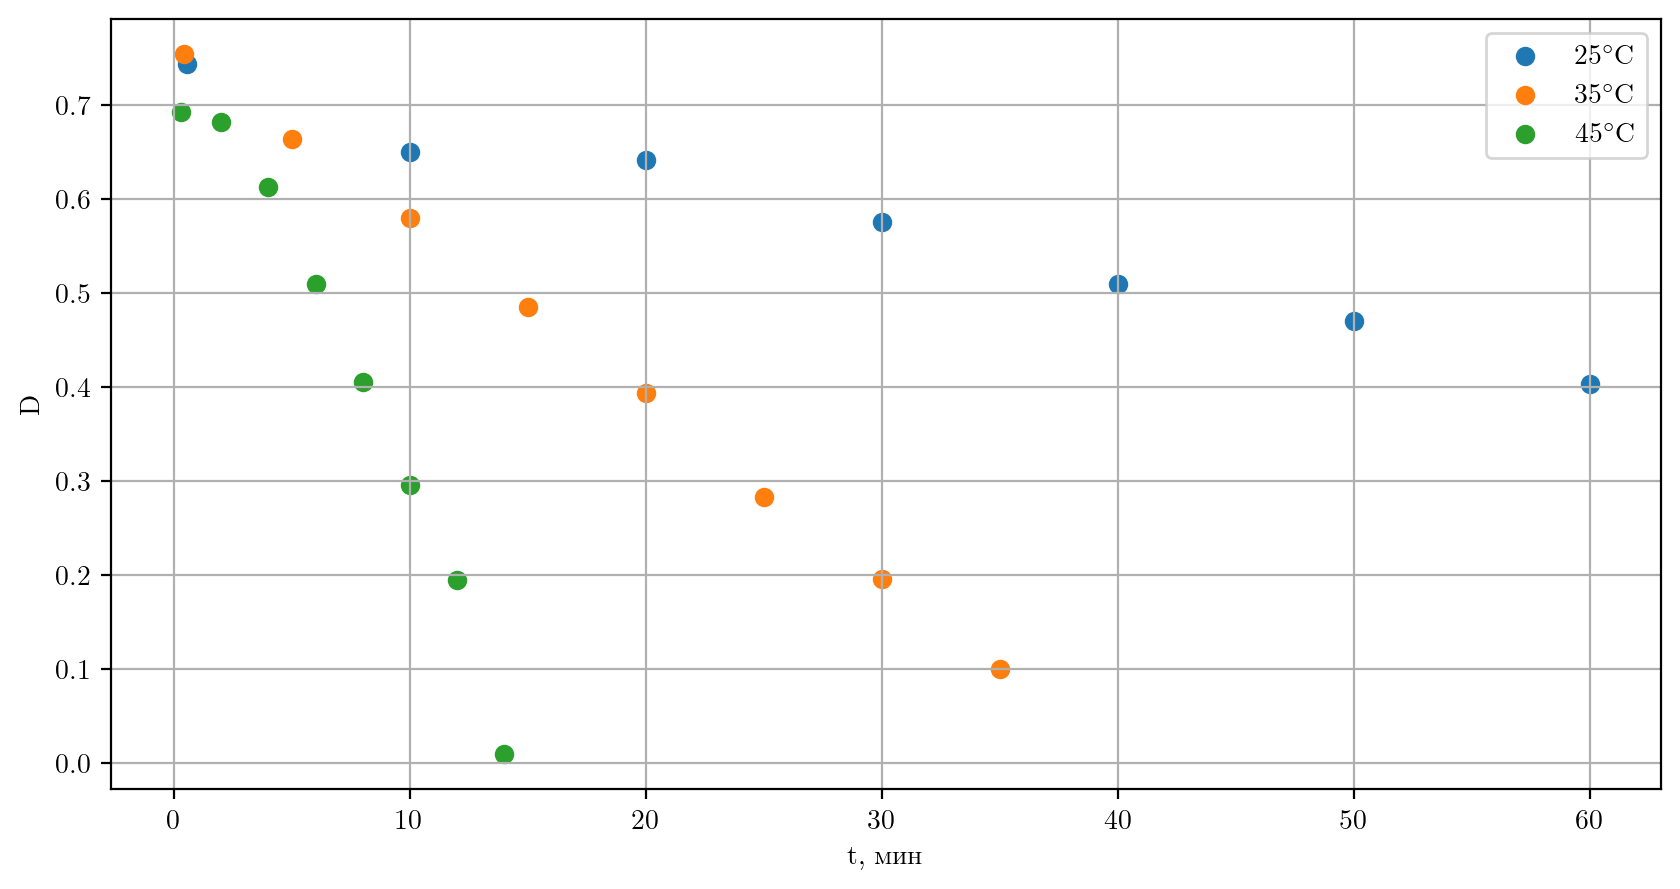

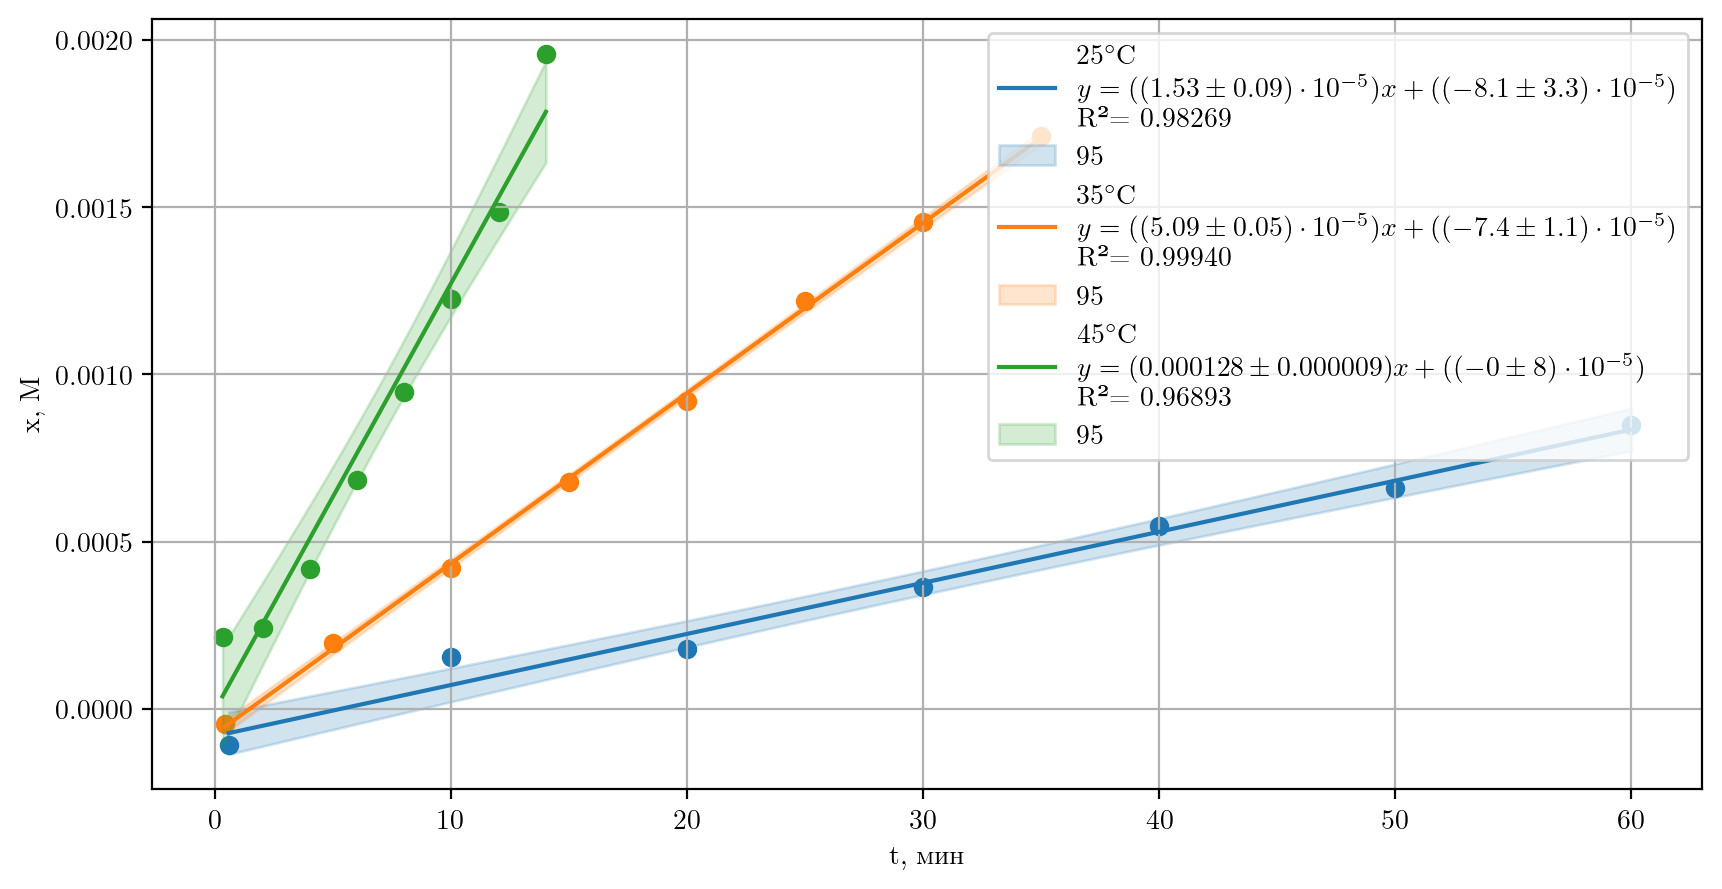

In [12]:
fig1, ax1 = plt.subplots(figsize=(10, 5), dpi=200)

fig2, ax2 = plt.subplots(figsize=(10, 5), dpi=200)

temps = [25, 35, 45]

r0 = []

slices = [slice(0), slice(0), slice(0)]

for i, df in enumerate(dfs):
    D0 = df.D.to_numpy()[0]
    df["x"] = (D0 - df.D) / D0 * C0_i2
    df.to_csv(f"{temps[i]}.csv")

    df = df.iloc[1:]

    ax1.scatter(df.t_min, df.D, label=f"{temps[i]}$^\\circ$C")
    ax1.set_xlabel("t, мин")
    ax1.set_ylabel("D")
    ax1.grid()
    ax1.legend()

    df2 = df  # [slices[i]]
    reg = UncRegression(df2.t_min, df2.x)
    reg.plot(ax=ax2, label=f"{temps[i]}$^\\circ$C",show_band=True)
    ax2.set_xlabel("t, мин")
    ax2.set_ylabel("x, M")

    r0.append(reg.coefs[0])

savefig("kinetic_curves_prak3", fig = fig1, bbox_inches = "tight")
savefig("x-t_prak3", fig = fig2, bbox_inches = "tight")

(0.00013052805280528053,
 0.07920792079207921,
 85617.71468314943+/-3612.5234161096246,
 -10298.017161793292+/-434.51087516353437)

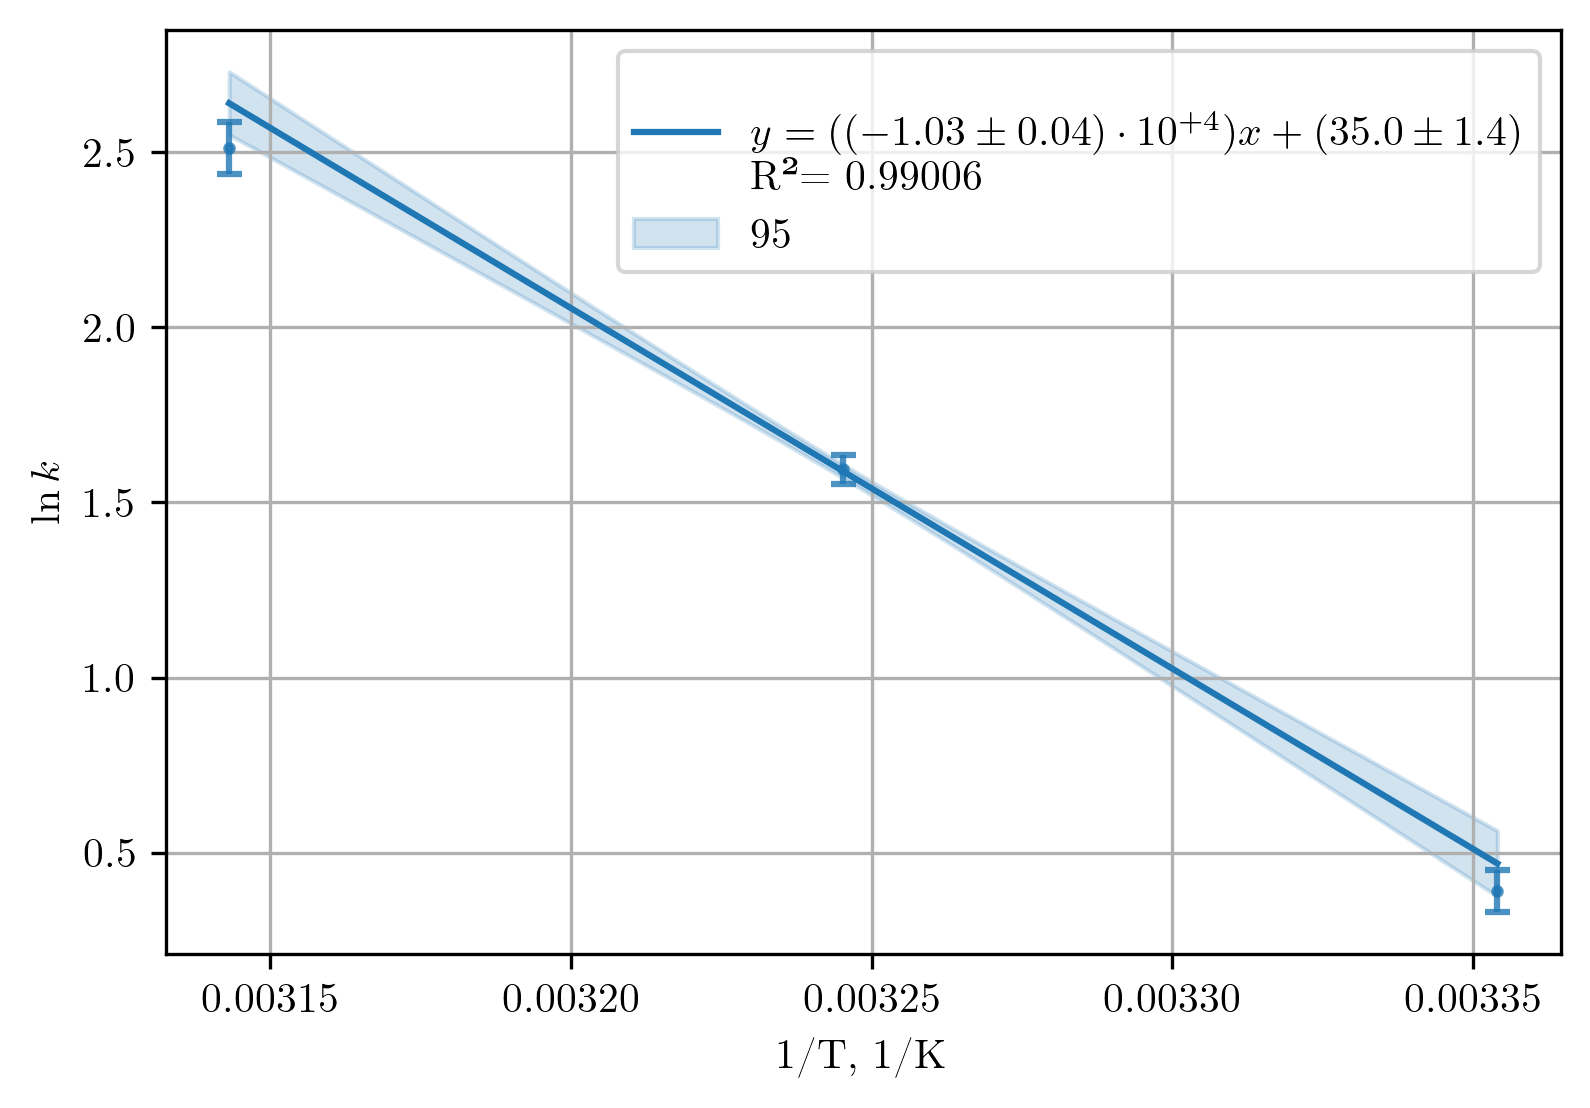

In [13]:
df = {"temp": temps, "r0": r0}
df = pd.DataFrame(df)

df.temp += 273.15
df["k"] = df.r0 / (C0_ac * C0_hcl)

df.to_csv("temp-r0_prak3.csv")

reg = UncRegression(1 / df.temp, unc.unumpy.log(df.k))

fig, ax = plt.subplots(figsize=(6,4), dpi =300)

reg.plot(ax = ax, show_band=True)
ax.set_xlabel("1/T, 1/K")
ax.set_ylabel("$\\ln k$")

savefig("lnk-1T_prak3", fig = fig, bbox_inches = "tight")

Ea = -reg.coefs[0] * 8.314

C0_ac, C0_hcl, Ea, reg.coefs[0]